In [147]:
#OpenCV, which stands for Open Source Computer Vision Library, is a library of programming functions mainly aimed at real-time computer vision
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
#The os module in Python is a built-in module that provides functions to interact with the operating system12os comes under Python’s standard utility modules. This module provides a portable way of using operating system-dependent functionality.
import os
#linear munpliation and more 
import numpy as np
#The imghdr is a module in Python that determines the type of image contained in a file or byte stream
import imghdr

# Clean Images

In [149]:
def clean_images(dir,image_exts=['jpeg','jpg', 'bmp', 'png']):
    #we will keep track of the total of images and the number of images with issuess
    num_img=0
    num_img_with_issues=0
    img_with_wrong_ext=0
    #Loop over each file in my dirctory    
    for image_class in os.listdir(dir): 
       #access the elements in my dirctory by using it's path using os.join funtion then loop over the images inside of it        
        for image in os.listdir(os.path.join(dir, image_class)):
            num_img=num_img+1
            #store the path of the image         
            image_path = os.path.join(dir, image_class, image)
            #test for any errors/Issues using try and except    
            try: 
                #read the image      
                img = cv2.imread(image_path)
                #get the type of the image 
                tip = imghdr.what(image_path)
                #if not the desired type print it and delete it
                if tip not in image_exts: 
                    img_with_wrong_ext=img_with_wrong_ext+1
                    print('Image not in ext list {}'.format(image_path))
                    os.remove(image_path)
            except Exception as e: 
                num_img_with_issues=num_img_with_issues+1
                print('Issue with image {}'.format(image_path))
    print(f"Total number of images : {num_img},number of images with issues : {num_img_with_issues},Image with wrong extensions: {img_with_wrong_ext}")
    print(f"Error percentage={num_img_with_issues/num_img}")
    print(f"Number ofimages that we will use if the errors are resolved {num_img-img_with_wrong_ext}")

In [150]:
clean_images(r'C:\\Users\karee\OneDrive\Desktop\projects\dataset')

Total number of images : 565,number of images with issues : 0,Image with wrong extensions: 0
Error percentage=0.0
Number ofimages that we will use if the errors are resolved 565


In this line of code, tf.keras.utils.image_dataset_from_directory() is a utility function in TensorFlow that loads a structured directory of images into a tf.data.Dataset. The structured directory is expected to contain sub-directories, each representing a class and containing images for that class. The function automatically infers the labels from the directory structure and returns a dataset of (image, label) pairs.

This function is very useful for creating datasets from large collections of images, and it also takes care of resizing and normalizing the images. However, it doesn’t perform any data augmentation. If you need data augmentation, you’ll have to add that yourself.

In [151]:
# Load image dataset from a directory into a format that can be used by TensorFlow
data = tf.keras.utils.image_dataset_from_directory('C:\\Users\karee\OneDrive\Desktop\projects\dataset')

Found 565 files belonging to 3 classes.


In [152]:
type(data)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [153]:
# 'as_numpy_iterator' converts the data into a generator that yields batched NumPy arrays. 
# 'data_iterator' is now an iterator that will return batches of images/labels in NumPy format when iterated over.
data_iterator = data.as_numpy_iterator()


In [154]:
# Here, you're getting the next batch of images and their corresponding labels from the 'data_iterator
batch = data_iterator.next()
type(batch)

tuple

In [155]:
# This will print a NumPy array representing your batch of images
print(batch[0])


[[[[170.        158.        158.       ]
   [170.22266   158.22266   158.22266  ]
   [171.        159.        159.       ]
   ...
   [ 94.37109   106.37109   128.3711   ]
   [ 94.        106.        128.       ]
   [ 93.07422   105.07422   127.07422  ]]

  [[170.50195   158.50195   158.50195  ]
   [170.61285   158.61285   158.61285  ]
   [171.18628   159.18628   159.18628  ]
   ...
   [ 94.37109   106.37109   128.3711   ]
   [ 94.        106.        128.       ]
   [ 93.07422   105.07422   127.07422  ]]

  [[171.0126    159.0126    159.0126   ]
   [171.16992   159.16992   159.16992  ]
   [171.47797   159.47797   159.47797  ]
   ...
   [ 94.47796   106.47796   128.47797  ]
   [ 94.037834  106.037834  128.03784  ]
   [ 93.23153   105.23153   127.23153  ]]

  ...

  [[ 31.         24.         16.       ]
   [ 31.222656   24.222656   16.222656 ]
   [ 32.371094   25.371094   17.371094 ]
   ...
   [ 55.11859    32.11859    18.118591 ]
   [ 66.59989    43.59989    29.599892 ]
   [ 62.82673   

In [156]:
# This will print a NumPy array representing your labels
#0 is lion
#1 is tiger
#2 is wolf
print(batch[1])

[0 1 1 2 1 0 1 2 2 1 1 0 2 1 0 0 1 1 0 0 2 1 2 2 2 0 2 0 0 0 2 2]


In [158]:
import matplotlib.pyplot as plt

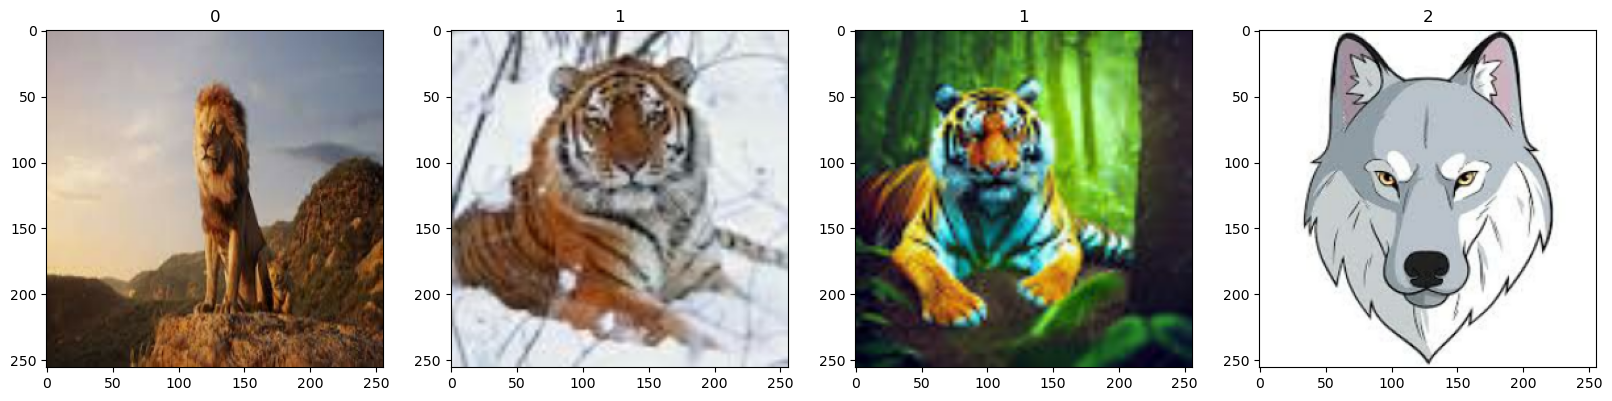

In [159]:
# Create a new figure with 4 subplots arranged in a single row, and set the figure size
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

# Loop over the first 4 images in the batch
for idx, img in enumerate(batch[0][:4]):
    # Display the image in the corresponding subplot
    ax[idx].imshow(img.astype(int))
    # Set the title of the subplot to the corresponding label in the batch
    ax[idx].title.set_text(batch[1][idx])


In [160]:
#scale the img data
scaled_data=data.map(lambda x,y:(x/255,y))

In [161]:
scaled_data_iterator = scaled_data.as_numpy_iterator()
print(f"max :{scaled_data_iterator.next()[0].max()}")
print(f"min {scaled_data_iterator.next()[0].min()}")

max :1.0
min 0.0


# Train-test-validation split  

In [162]:
# Calculate the size of the training set as 70% of the total data
train_size = int(len(scaled_data)*.7)
# Calculate the size of the validation set as 20% of the total data
val_size = int(len(scaled_data)*.2)
# Calculate the size of the test set as 10% of the total data
test_size = int(len(scaled_data)*.1)


In [163]:
print(f"train size={train_size},test size={test_size},validaition size ={val_size}")

train size=12,test size=1,validaition size =3


In [164]:
#take from the data the desired size
Train=scaled_data.take(train_size)
#take the data after the train data
Val=scaled_data.skip(train_size).take(val_size)
#take the data after the train and validaition data
Test=scaled_data.skip(train_size).skip(val_size).take(train_size)

# Model

In [165]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(
optimizer=tf.keras.optimizers.Adam(),
    loss=tf.losses.SparseCategoricalCrossentropy(),
    metrics=['SparseCategoricalAccuracy']
)


In [166]:
model.fit(Train, epochs=20, validation_data=Val)

Epoch 1/20
12/12 [==============================] - 29s 2s/step - loss: 1.5366 - sparse_categorical_accuracy: 0.3854 - val_loss: 1.0226 - val_sparse_categorical_accuracy: 0.4688
Epoch 2/20
12/12 [==============================] - 25s 2s/step - loss: 1.0236 - sparse_categorical_accuracy: 0.5312 - val_loss: 0.9764 - val_sparse_categorical_accuracy: 0.5208
Epoch 3/20
12/12 [==============================] - 27s 2s/step - loss: 0.8947 - sparse_categorical_accuracy: 0.6146 - val_loss: 0.8269 - val_sparse_categorical_accuracy: 0.7083
Epoch 4/20
12/12 [==============================] - 27s 2s/step - loss: 0.7517 - sparse_categorical_accuracy: 0.6667 - val_loss: 0.6694 - val_sparse_categorical_accuracy: 0.7500
Epoch 5/20
12/12 [==============================] - 26s 2s/step - loss: 0.7035 - sparse_categorical_accuracy: 0.7266 - val_loss: 0.6761 - val_sparse_categorical_accuracy: 0.7396
Epoch 6/20
12/12 [==============================] - 26s 2s/step - loss: 0.5547 - sparse_categorical_accuracy: 

In [167]:
from tensorflow.keras.metrics import Precision, Recall,Accuracy
pre = Precision()
re = Recall()
acc=Accuracy()

In [168]:
# iterate over each batch in the test dataset
for batch in Test.as_numpy_iterator(): 
    X, y = batch # split the batch into features (X) and labels (y) 
    yhat = model.predict(X)  # predict the labels using the model
    yhat_classes = np.argmax(yhat, axis=-1)  # convert the predicted probabilities to class labels
    pre.update_state(y, yhat_classes)  # update the precision metric state with true and predicted labels
    re.update_state(y, yhat_classes)  # update the recall metric state with true and predicted labels
    acc.update_state(y, yhat_classes)  # update the accuracy metric state with true and predicted labels


1/1 [==============================] - 0s 239ms/step


In [169]:
print(pre.result(), re.result(),acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
